In [7]:
# Install required packages
!pip install google-generativeai python-dotenv requests praw transformers Pillow
!sudo apt-get install -y fonts-dejavu  # Fixes font issues in image generation

import os
import requests
import praw
from dotenv import load_dotenv
from PIL import Image, ImageDraw, ImageFont
import google.generativeai as genai

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-dejavu is already the newest version (2.37-2build1).
0 upgraded, 0 newly installed, 0 to remove and 87 not upgraded.


In [9]:
# Install required packages
!pip install google-generativeai python-dotenv requests Pillow

import os
import requests
from dotenv import load_dotenv
from PIL import Image, ImageDraw, ImageFont
import google.generativeai as genai
import textwrap
import io

# Load environment variables
load_dotenv()

# Set up Gemini
def setup_gemini():
    GEMINI_API_KEY = os.getenv("GEMINI_API_KEY")
    if not GEMINI_API_KEY:
        # If running in Kaggle, use secrets
        from kaggle_secrets import UserSecretsClient
        user_secrets = UserSecretsClient()
        GEMINI_API_KEY = user_secrets.get_secret("GEMINI_API_KEY")
    
    genai.configure(api_key=GEMINI_API_KEY)
    return genai.GenerativeModel('gemini-pro')

# Define meme templates with text positions
MEME_TEMPLATES = [
    {
        "name": "Drake Hotline Bling",
        "url": "https://i.imgflip.com/30b1gx.jpg",
        "text_positions": [
            {"x": 400, "y": 150, "width": 300, "height": 100},  # Top box
            {"x": 400, "y": 400, "width": 300, "height": 100}   # Bottom box
        ]
    },
    {
        "name": "Distracted Boyfriend",
        "url": "https://i.imgflip.com/1ur9b0.jpg",
        "text_positions": [
            {"x": 100, "y": 50, "width": 200, "height": 80},   # Girlfriend
            {"x": 400, "y": 150, "width": 200, "height": 80},  # Guy
            {"x": 700, "y": 50, "width": 200, "height": 80}    # Other girl
        ]
    },
    {
        "name": "Two Buttons",
        "url": "https://i.imgflip.com/1g8my4.jpg",
        "text_positions": [
            {"x": 150, "y": 50, "width": 200, "height": 80},   # Left button
            {"x": 550, "y": 50, "width": 200, "height": 80}    # Right button
        ]
    },
    {
        "name": "Expanding Brain",
        "url": "https://i.imgflip.com/1jwhww.jpg",
        "text_positions": [
            {"x": 50, "y": 50, "width": 200, "height": 50},   # Level 1
            {"x": 50, "y": 200, "width": 200, "height": 50},  # Level 2
            {"x": 50, "y": 350, "width": 200, "height": 50}, # Level 3
            {"x": 50, "y": 500, "width": 200, "height": 50}  # Level 4
        ]
    }
]

def get_meme_template(name=None):
    """Get a meme template by name or random if not specified"""
    if name:
        for template in MEME_TEMPLATES:
            if template["name"] == name:
                return template
    # Return random template if not found or not specified
    return MEME_TEMPLATES[0]

# Test Gemini connection
try:
    model = setup_gemini()
    print("✅ Gemini API connected successfully")
except Exception as e:
    print(f"❌ Gemini connection failed: {str(e)}")
    print("Troubleshooting: Get API key from https://aistudio.google.com/app/apikey and set as GEMINI_API_KEY in secrets")

# Test template selection
template = get_meme_template("Drake Hotline Bling")
print(f"\nSelected template: {template['name']}")

✅ Gemini API connected successfully

Selected template: Drake Hotline Bling


Using model: gemini-2.5-flash-lite-preview-06-17
Using template: Drake Hotline Bling

Caption:
Box 1: My human job
Box 2: AI doing it

✅ Meme created: generated_meme.jpg


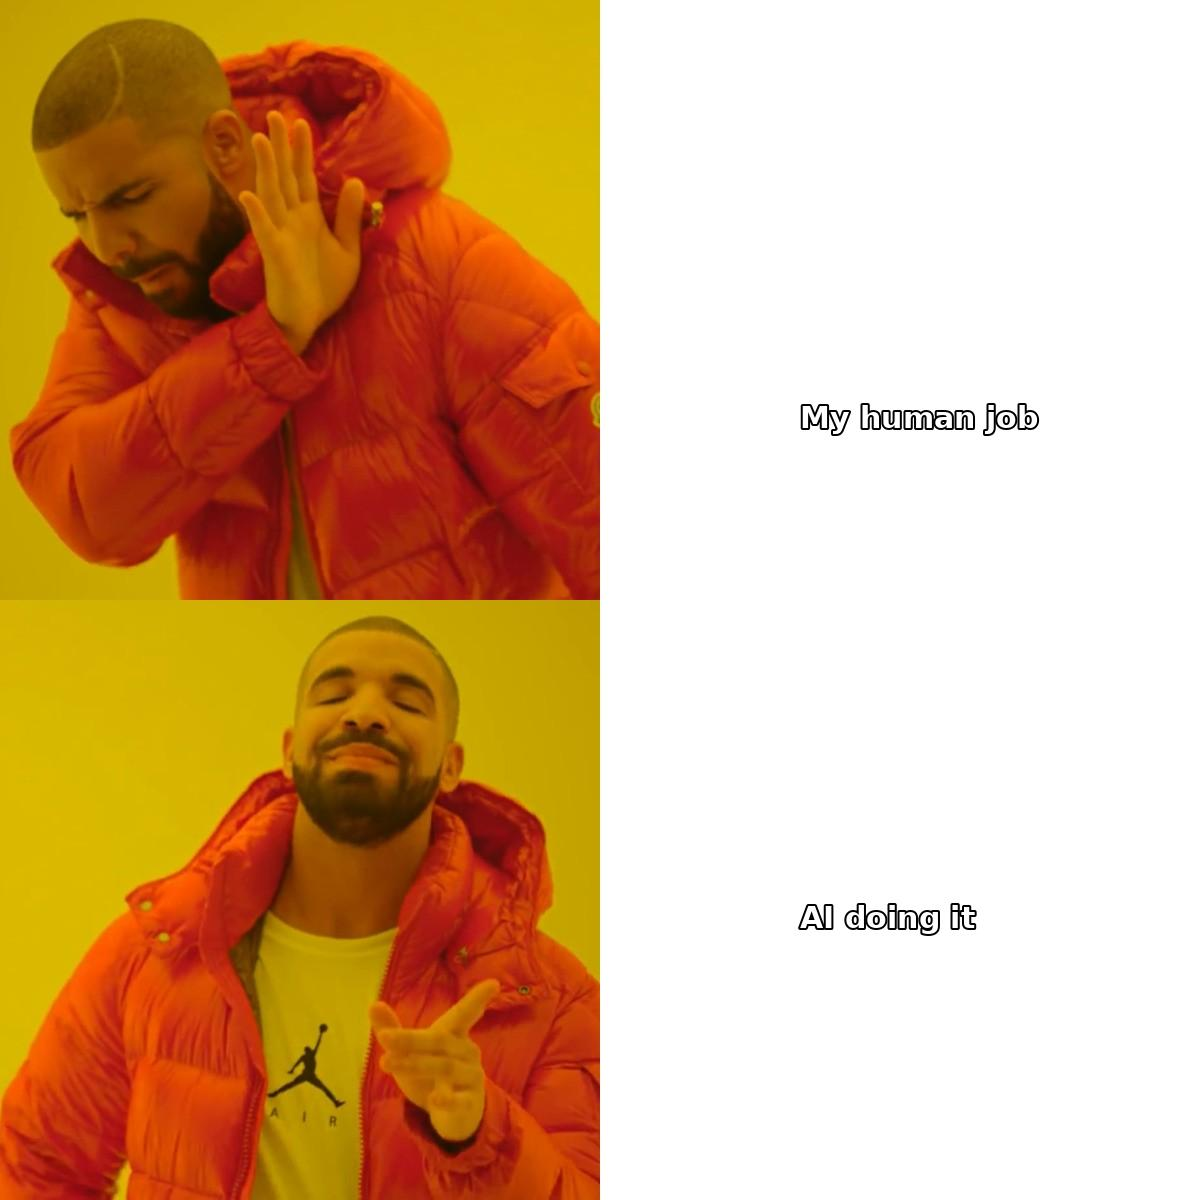

In [21]:
import os
import requests
from dotenv import load_dotenv
from PIL import Image, ImageDraw, ImageFont
import google.generativeai as genai
import textwrap
import io
from IPython.display import display, Image as IPImage

# Load environment variables
load_dotenv()

# Set up Gemini
def setup_gemini():
    GEMINI_API_KEY = os.getenv("GEMINI_API_KEY")
    if not GEMINI_API_KEY:
        from kaggle_secrets import UserSecretsClient
        user_secrets = UserSecretsClient()
        GEMINI_API_KEY = user_secrets.get_secret("GEMINI_API_KEY")
    
    genai.configure(api_key=GEMINI_API_KEY)
    
    # Use the available text generation model
    model_name = 'gemini-2.5-flash-lite-preview-06-17'
    try:
        print(f"Using model: {model_name}")
        return genai.GenerativeModel(model_name)
    except Exception as e:
        print(f"Model initialization failed: {str(e)}")
        # Try fallback models
        fallback_models = ['gemini-1.5-pro', 'gemini-1.0-pro']
        for fallback in fallback_models:
            try:
                print(f"Trying fallback model: {fallback}")
                return genai.GenerativeModel(fallback)
            except:
                continue
        print("All models failed")
        return None

# Define meme templates with text positions
MEME_TEMPLATES = [
    {
        "name": "Drake Hotline Bling",
        "url": "https://i.imgflip.com/30b1gx.jpg",
        "text_positions": [
            {"x": 800, "y": 400, "width": 300, "height": 100},  # Top box
            {"x": 800, "y": 900, "width": 300, "height": 100}   # Bottom box
        ],
        "description": "Two-panel meme showing Drake rejecting something in the top panel and approving something in the bottom panel"
    },
    {
        "name": "Distracted Boyfriend",
        "url": "https://i.imgflip.com/1ur9b0.jpg",
        "text_positions": [
            {"x": 100, "y": 50, "width": 200, "height": 80},   # Girlfriend
            {"x": 400, "y": 150, "width": 200, "height": 80},  # Guy
            {"x": 700, "y": 50, "width": 200, "height": 80}    # Other girl
        ],
        "description": "Meme showing a man looking at another woman while walking with his girlfriend"
    }
]

def get_meme_template(name=None):
    """Get a meme template by name or random if not specified"""
    if name:
        for template in MEME_TEMPLATES:
            if template["name"] == name:
                return template
    return MEME_TEMPLATES[0]  # Return first template

# Initialize model
model = setup_gemini()
if not model:
    print("❌ Failed to initialize Gemini model. Check API key and model availability.")

def generate_meme_caption(template, topic="technology", brand_context="Our Brand"):
    """Generate meme captions using Gemini"""
    box_count = len(template["text_positions"])
    template_name = template["name"]
    template_desc = template["description"]
    
    prompt = f"""
    Create funny, viral meme captions for the '{template_name}' template about '{topic}'.
    Brand context: {brand_context}
    Template description: {template_desc}
    
    Requirements:
    - Create exactly {box_count} text boxes
    - Format response as: 
        Box 1: [text]
        Box 2: [text]
        ...
    - Keep each box text short (3-5 words max)
    - Make it humorous and relevant to current internet culture
    """
    
    try:
        response = model.generate_content(
            prompt,
            generation_config=genai.types.GenerationConfig(
                temperature=0.9,
                max_output_tokens=100,
            ),
            safety_settings={
                'HATE': 'BLOCK_NONE',
                'HARASSMENT': 'BLOCK_NONE',
                'SEXUAL': 'BLOCK_NONE',
                'DANGEROUS': 'BLOCK_NONE'
            }
        )
        return response.text
    except Exception as e:
        print(f"Caption generation failed: {str(e)}")
        return None

def create_meme_image(template, captions):
    """Create meme image with text overlay"""
    try:
        # Download template image
        response = requests.get(template["url"])
        img = Image.open(io.BytesIO(response.content))
        
        # Convert to RGB if needed
        if img.mode != 'RGB':
            img = img.convert('RGB')
            
        draw = ImageDraw.Draw(img)
        
        # Load font
        try:
            font = ImageFont.truetype("DejaVuSans-Bold.ttf", 30)
        except:
            try:
                font = ImageFont.truetype("Arial Bold.ttf", 30)
            except:
                font = ImageFont.load_default()
        
        # Process captions
        caption_lines = []
        for line in captions.split('\n'):
            line = line.strip()
            if not line:
                continue
            if ':' in line:
                line = line.split(':', 1)[1].strip()
            caption_lines.append(line)
        
        # Add text to each position
        for i, position in enumerate(template["text_positions"]):
            if i < len(caption_lines):
                text = caption_lines[i]
                wrapped_text = textwrap.fill(text, width=15)
                draw.text(
                    (position["x"], position["y"]),
                    wrapped_text,
                    fill="white",
                    font=font,
                    stroke_width=2,
                    stroke_fill="black"
                )
        
        img.save("generated_meme.jpg")
        return "generated_meme.jpg"
        
    except Exception as e:
        print(f"Image creation failed: {str(e)}")
        return None

# Test with simpler approach
if model:
    template = get_meme_template("Drake Hotline Bling")
    print(f"Using template: {template['name']}")
    
    # Use a fallback caption if generation fails
    caption = generate_meme_caption(template, "AI taking over jobs", "Tech Startup")
    
    if not caption:
        print("Using fallback caption")
        caption = """Box 1: Writing code manually
Box 2: Using AI to write code"""
    
    print("\nCaption:")
    print(caption)
    
    meme_path = create_meme_image(template, caption)
    if meme_path:
        print(f"\n✅ Meme created: {meme_path}")
        display(IPImage(filename=meme_path))
    else:
        print("❌ Failed to create meme image")
else:
    print("Skipping tests due to model initialization failure")

Using model: gemini-2.5-flash-lite-preview-06-17
Using template: Distracted Boyfriend

Caption:
Box 1: Essential client work
Box 2: Digital Marketing Team
Box 3: Another TikTok trend

✅ Meme created: generated_meme.jpg


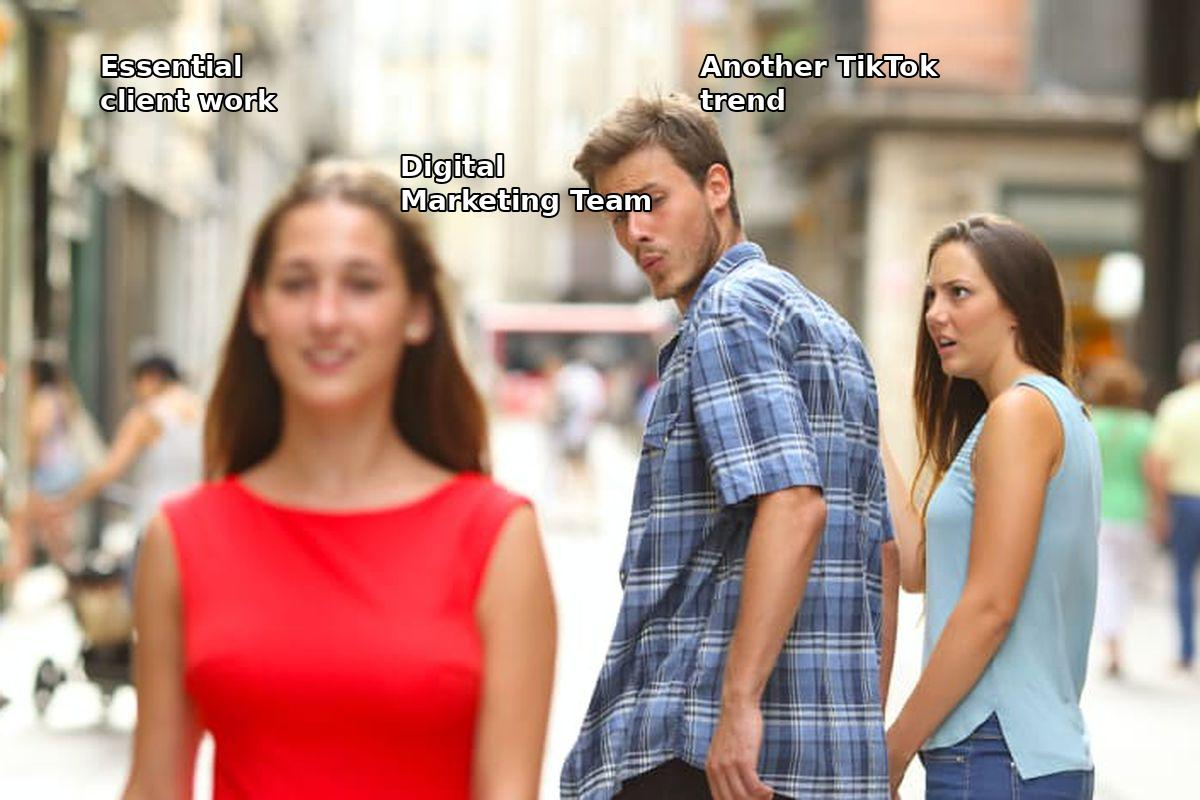

In [22]:
import os
import requests
from dotenv import load_dotenv
from PIL import Image, ImageDraw, ImageFont
import google.generativeai as genai
import textwrap
import io
from IPython.display import display, Image as IPImage

# Load environment variables
load_dotenv()

# Set up Gemini
def setup_gemini():
    GEMINI_API_KEY = os.getenv("GEMINI_API_KEY")
    if not GEMINI_API_KEY:
        from kaggle_secrets import UserSecretsClient
        user_secrets = UserSecretsClient()
        GEMINI_API_KEY = user_secrets.get_secret("GEMINI_API_KEY")
    
    genai.configure(api_key=GEMINI_API_KEY)
    
    # Use the available text generation model
    model_name = 'gemini-2.5-flash-lite-preview-06-17'
    try:
        print(f"Using model: {model_name}")
        return genai.GenerativeModel(model_name)
    except Exception as e:
        print(f"Model initialization failed: {str(e)}")
        return None

# Define meme templates with text positions
MEME_TEMPLATES = [
    {
        "name": "Distracted Boyfriend",
        "url": "https://i.imgflip.com/1ur9b0.jpg",
        "text_positions": [
            {"x": 100, "y": 50, "width": 200, "height": 80},   # Girlfriend
            {"x": 400, "y": 150, "width": 200, "height": 80},  # Guy
            {"x": 700, "y": 50, "width": 200, "height": 80}    # Other girl
        ],
        "description": "Meme showing a man looking at another woman while walking with his girlfriend"
    }
]

def get_meme_template(name=None):
    """Get a meme template by name or random if not specified"""
    if name:
        for template in MEME_TEMPLATES:
            if template["name"] == name:
                return template
    return MEME_TEMPLATES[0]  # Return first template

# Initialize model
model = setup_gemini()
if not model:
    print("❌ Failed to initialize Gemini model. Check API key and model availability.")

def generate_meme_caption(template, topic="social media", brand_context="Marketing Team"):
    """Generate meme captions using Gemini"""
    box_count = len(template["text_positions"])
    template_name = template["name"]
    template_desc = template["description"]
    
    prompt = f"""
    Create a funny, viral meme using the '{template_name}' template about '{topic}' for a brand called '{brand_context}'.
    Template description: {template_desc}
    
    This meme has {box_count} text boxes:
    1. What the girlfriend is thinking
    2. What the boyfriend is thinking
    3. What the other girl represents
    
    Format your response as:
    Box 1: [text]
    Box 2: [text]
    Box 3: [text]
    
    Keep each box text short (3-5 words max) and make it humorous.
    
    Example:
    Box 1: Our old marketing strategy
    Box 2: Our marketing team
    Box 3: This new viral meme trend
    """
    
    try:
        response = model.generate_content(
            prompt,
            generation_config=genai.types.GenerationConfig(
                temperature=1.0,  # More creative
                max_output_tokens=100,
            ),
            safety_settings={
                'HATE': 'BLOCK_NONE',
                'HARASSMENT': 'BLOCK_NONE',
                'SEXUAL': 'BLOCK_NONE',
                'DANGEROUS': 'BLOCK_NONE'
            }
        )
        return response.text
    except Exception as e:
        print(f"Caption generation failed: {str(e)}")
        return None

def create_meme_image(template, captions):
    """Create meme image with text overlay"""
    try:
        # Download template image
        response = requests.get(template["url"])
        img = Image.open(io.BytesIO(response.content))
        
        # Convert to RGB if needed
        if img.mode != 'RGB':
            img = img.convert('RGB')
            
        draw = ImageDraw.Draw(img)
        
        # Load font
        try:
            # Try to load a bold font
            font = ImageFont.truetype("DejaVuSans-Bold.ttf", 28)
        except:
            try:
                font = ImageFont.truetype("Arial Bold.ttf", 28)
            except:
                # Use default font if others fail
                font = ImageFont.load_default()
                print("Using default font")
        
        # Process captions
        caption_lines = []
        for line in captions.split('\n'):
            line = line.strip()
            if not line:
                continue
            if ':' in line:
                line = line.split(':', 1)[1].strip()
            caption_lines.append(line)
        
        # Add text to each position
        for i, position in enumerate(template["text_positions"]):
            if i < len(caption_lines):
                text = caption_lines[i]
                wrapped_text = textwrap.fill(text, width=15)  # Wrap text
                
                # Draw text with outline for readability
                draw.text(
                    (position["x"], position["y"]),
                    wrapped_text,
                    fill="white",
                    font=font,
                    stroke_width=2,
                    stroke_fill="black"
                )
        
        img.save("generated_meme.jpg")
        return "generated_meme.jpg"
        
    except Exception as e:
        print(f"Image creation failed: {str(e)}")
        return None

# Test with Distracted Boyfriend template
if model:
    template = get_meme_template("Distracted Boyfriend")
    print(f"Using template: {template['name']}")
    
    # Generate caption
    caption = generate_meme_caption(template, "social media trends", "Digital Marketing Team")
    
    if not caption:
        print("Using fallback caption")
        caption = """Box 1: Our old marketing strategy
Box 2: Our marketing team
Box 3: This new viral meme trend"""
    
    print("\nCaption:")
    print(caption)
    
    meme_path = create_meme_image(template, caption)
    if meme_path:
        print(f"\n✅ Meme created: {meme_path}")
        display(IPImage(filename=meme_path))
    else:
        print("❌ Failed to create meme image")
else:
    print("Skipping tests due to model initialization failure")